### Importing Libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [80]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Dropping insignificant features

In [83]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)

In [84]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Finding null values for age

In [85]:
df[df.Age.isnull()].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

### Filling null values

In [86]:
df.fillna(df.mean(),inplace = True)
df.head()
df.loc[19]

Survived          1
Pclass            3
Sex          female
Age         29.6991
SibSp             0
Parch             0
Fare          7.225
Embarked          C
Name: 19, dtype: object

### Boolean lists for survivors

In [87]:
survived = df.Survived == True
died = df.Survived == False

### Fare for those who survived and died

In [88]:
df.Fare[survived].mean()

48.39540760233917

In [89]:
df.Fare[died].mean()

22.117886885245877

### Plotting a graph

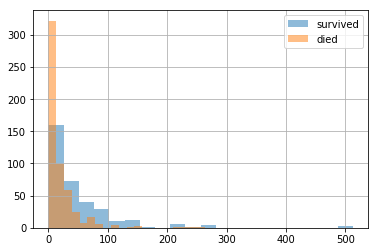

In [90]:
df.Fare[survived].hist(alpha = 0.5, bins = 20,label = 'survived')
df.Fare[died].hist(alpha = 0.5,bins = 20, label = 'died');
plt.legend();

<a id='eda'></a>
## Exploratory Data Analysis



### Survivors according to class

In [91]:
df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

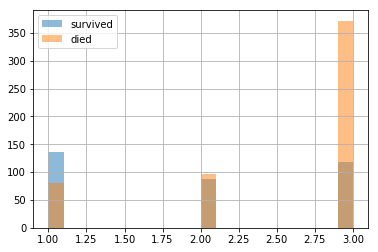

In [92]:
df.Pclass[survived].hist(alpha = 0.5, bins = 20,label = 'survived')
df.Pclass[died].hist(alpha = 0.5,bins = 20, label = 'died');
plt.legend();

### Survivors according to age

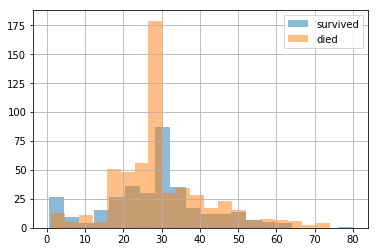

In [93]:
df.Age[survived].hist(alpha = 0.5, bins = 20,label = 'survived')
df.Age[died].hist(alpha = 0.5,bins = 20, label = 'died');
plt.legend();

In [94]:
df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### Number of survivors according to gender

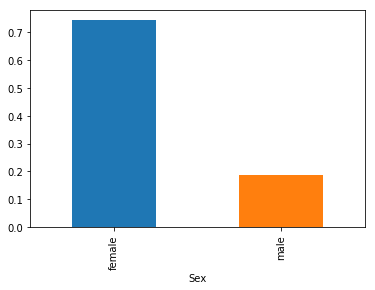

In [95]:
df.groupby('Sex').Survived.mean().plot(kind= 'bar');

The number of female survivors were significantly more as compared to male.

### Survivors according to class and gender

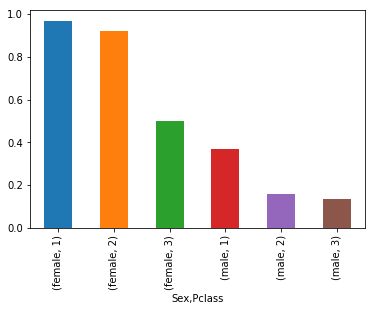

In [96]:
df.groupby(['Sex','Pclass']).Survived.mean().plot(kind = 'bar')

### Survivors with respect to Sibling/ Spouse

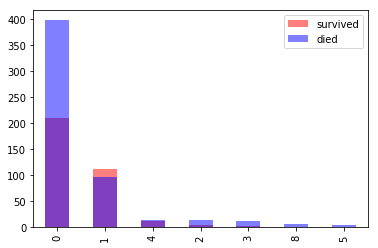

In [97]:
df.SibSp[survived].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'survived', color = 'red')
df.SibSp[died].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'died', color = 'blue')
plt.legend();